In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
X = iris.data
y = iris.target

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## Pre Pruning

In [16]:
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
}

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
treemodel = DecisionTreeClassifier()
classifier = GridSearchCV(treemodel,param_grid = parameter,cv =5,scoring='accuracy')

In [21]:
classifier.fit(X_train,y_train)

C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [22]:
classifier.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'best'}

Now we got our best parameters

In [24]:
treeModel = DecisionTreeClassifier(criterion='gini',max_depth= 4,max_features= 'auto',splitter='best')

In [25]:
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto')

In [26]:
y_pred = treeModel.predict(X_test)

[Text(0.4444444444444444, 0.9, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.5, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 5.95\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.6666666666666666, 0.3, 'X[2] <= 4.85\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.7777777777777778, 0.

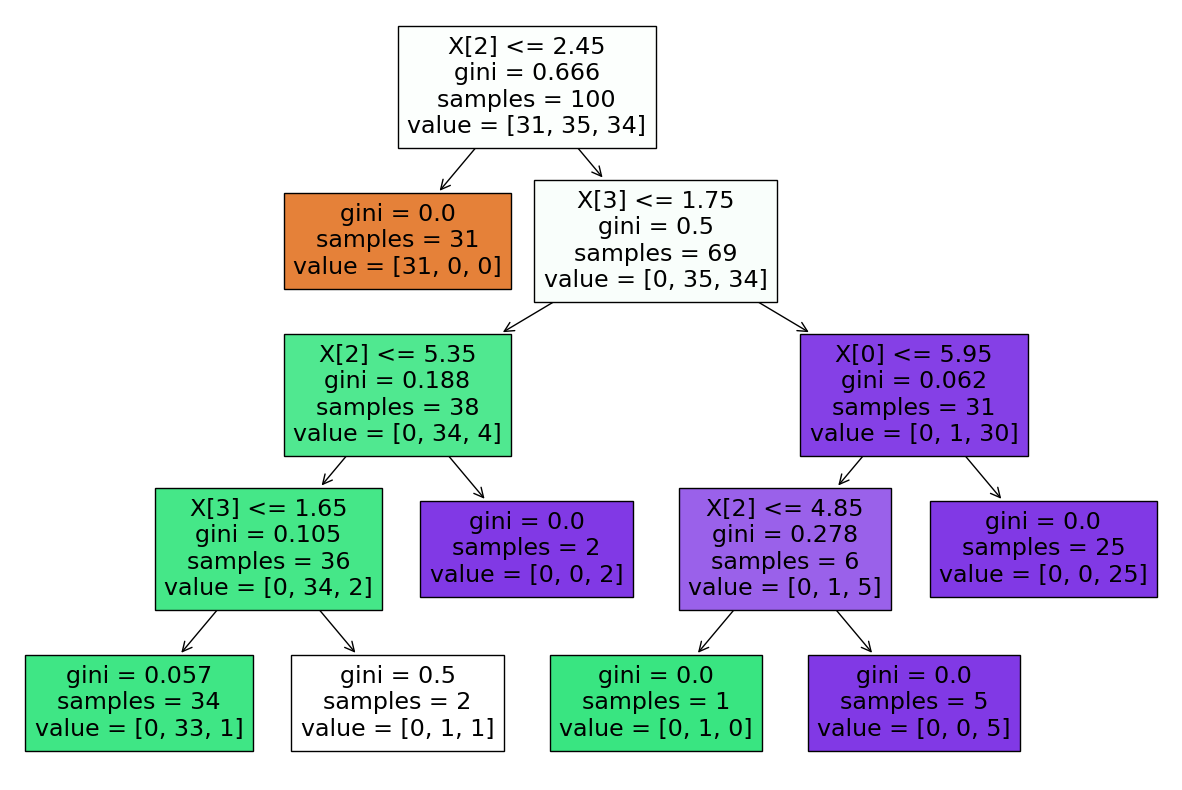

In [27]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeModel,filled=True)

In [28]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.98

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

